In [ ]:
import pandas as pd

url = '/Users/lucastourinho/WineQuality/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo.head()

# SMOTE para balancear

# KNN para classificar cor do vinho baseado em outras feats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
# Informações gerais sobre o dataset
print(arquivo.info())

# Descrição estatística das variáveis numéricas
print(arquivo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

In [4]:
print(arquivo['color'].value_counts())

color
white    4898
red      1599
Name: count, dtype: int64


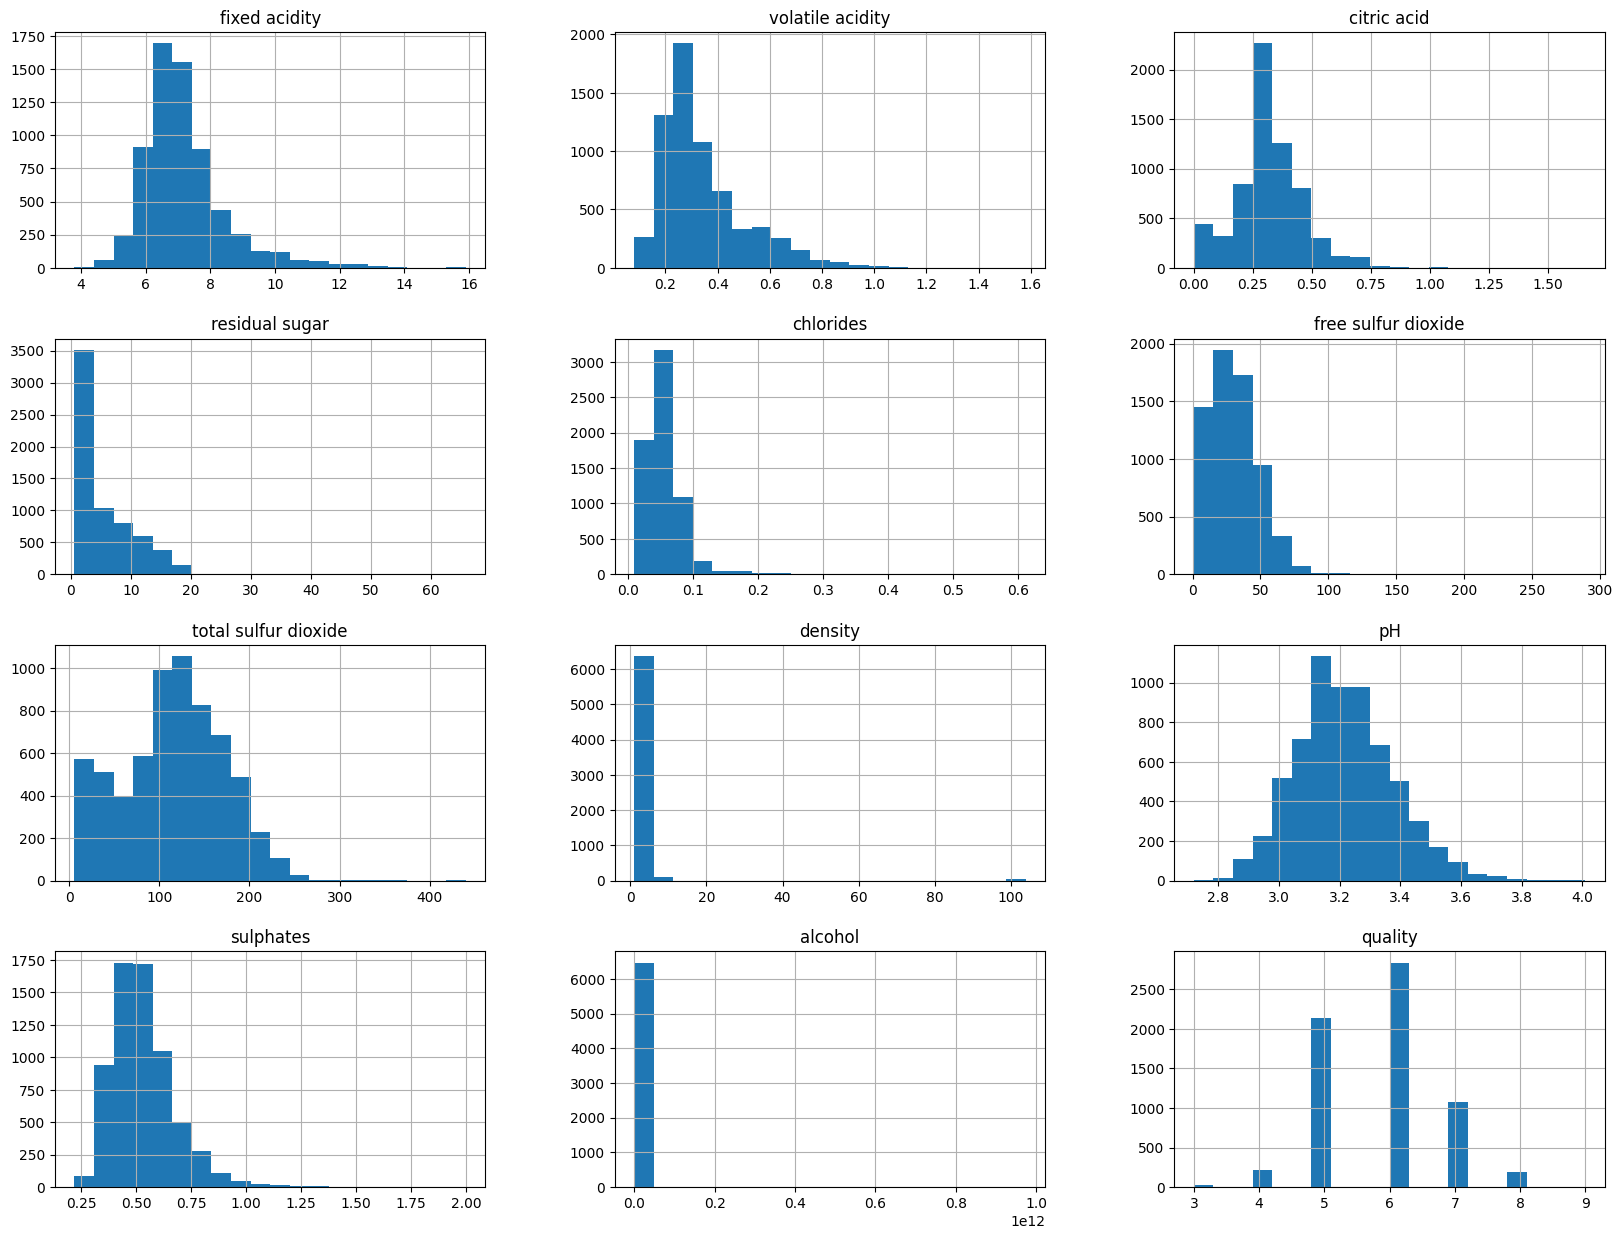

In [5]:
import matplotlib.pyplot as plt
arquivo.hist(figsize=(20, 15), bins=20)
plt.show()

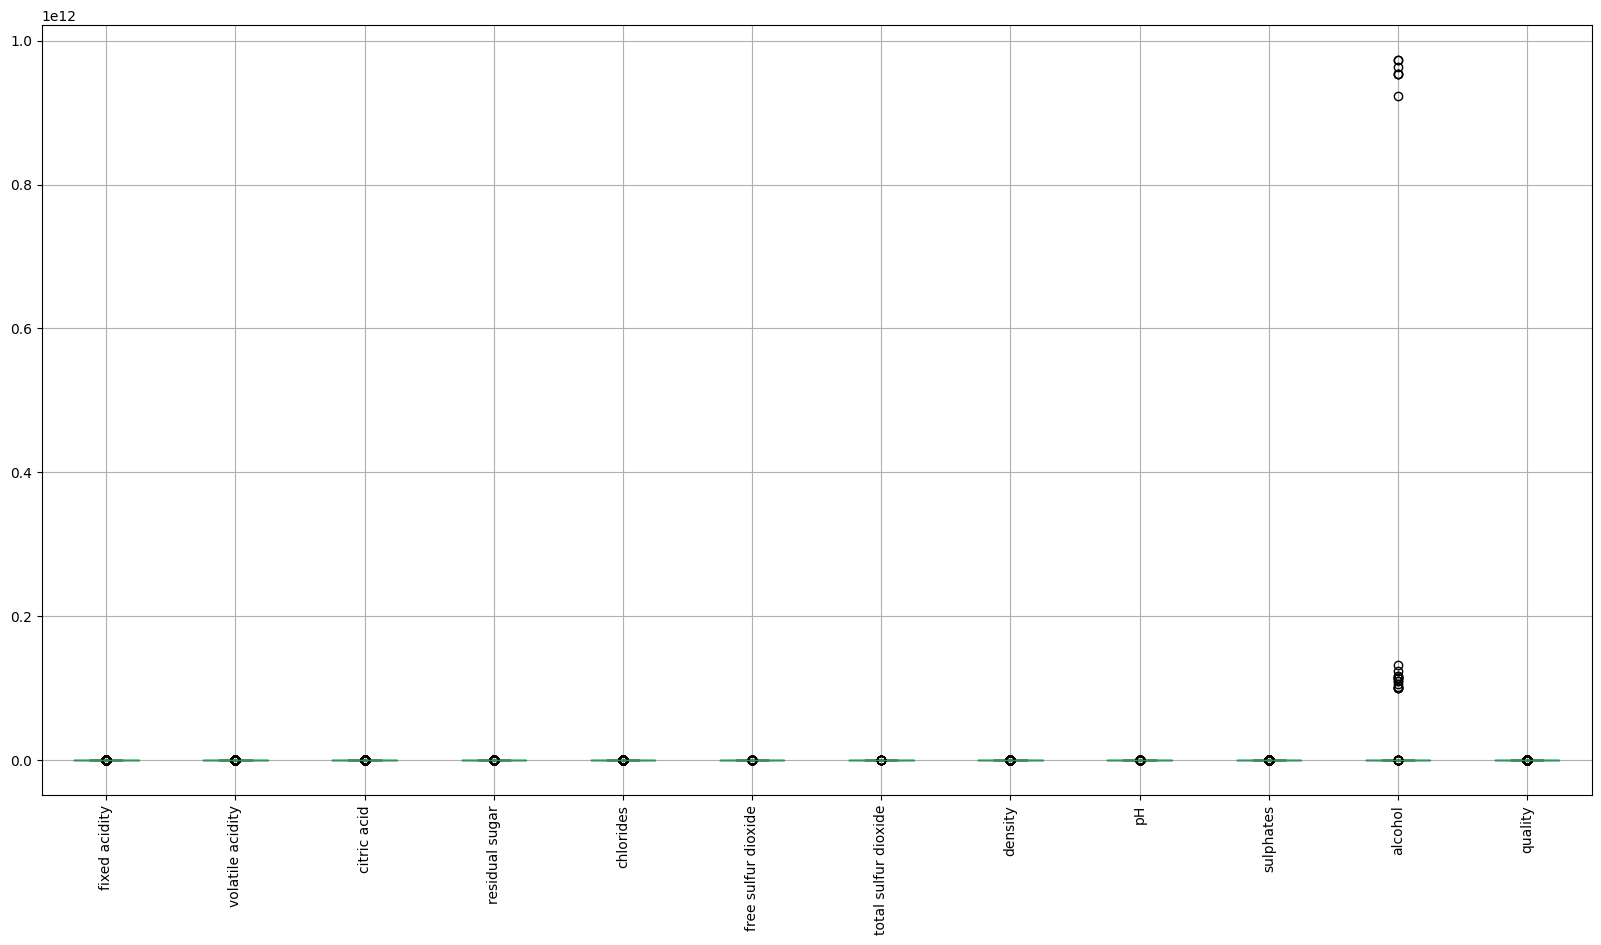

In [6]:
arquivo.boxplot(figsize=(20, 10), rot=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 0 = red         1 = white
label_encoder = LabelEncoder()
arquivo['color'] = label_encoder.fit_transform(arquivo['color'])

# Display the first few rows of the DataFrame
print(arquivo.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6      1  
1      9.5        6      1  

In [17]:
y = arquivo['quality']
X = arquivo.drop('quality', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming x is your feature set and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separar features (X) e rótulo (y)
X = arquivo.drop(columns=['color'])  # Mantemos todas as features, exceto a cor
y = arquivo['color']  # Nosso target será a cor (0 = Red, 1 = White)

# Verificar a distribuição antes do SMOTE
print("Distribuição original das classes:", Counter(y))

# Aplicar SMOTE para balancear as classes
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a distribuição após o SMOTE
print("Distribuição após SMOTE:", Counter(y_resampled))

# Dividir os dados balanceados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Padronizar os dados para melhor performance do KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo KNN com os dados balanceados
knn = KNeighborsClassifier(n_neighbors=5)  # Pode ajustar 'n_neighbors' para otimizar
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("\n📌 Acurácia do modelo KNN após SMOTE:", accuracy)
print("\n📌 Relatório de classificação:\n", classification_report(y_test, y_pred, target_names=['Red', 'White']))

Distribuição original das classes: Counter({1: 4898, 0: 1599})
Distribuição após SMOTE: Counter({1: 4898, 0: 4898})

📌 Acurácia do modelo KNN após SMOTE: 0.9943877551020408

📌 Relatório de classificação:
               precision    recall  f1-score   support

         Red       0.99      1.00      0.99       947
       White       1.00      0.99      0.99      1013

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



In [55]:
# Selecionar apenas as features químicas relevantes para diferenciar Red e White
features = ['volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'alcohol']
X = arquivo[features]  # Mantemos apenas essas features
y = arquivo['color']  # Nosso target será a cor (0 = Red, 1 = White)

# Verificar a distribuição antes do SMOTE
print("Distribuição original das classes:", Counter(y))

# Aplicar SMOTE para balancear as classes
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a distribuição após o SMOTE
print("Distribuição após SMOTE:", Counter(y_resampled))

# Dividir os dados balanceados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Padronizar os dados para melhor performance do KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo KNN com os dados balanceados
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("\n ~ Acurácia do modelo KNN após seleção de features:", accuracy)
print("\n~ Relatório de classificação:\n", classification_report(y_test, y_pred, target_names=['Red', 'White']))


Distribuição original das classes: Counter({1: 4898, 0: 1599})
Distribuição após SMOTE: Counter({1: 4898, 0: 4898})

 ~ Acurácia do modelo KNN após seleção de features: 0.9760204081632653

~ Relatório de classificação:
               precision    recall  f1-score   support

         Red       0.96      0.99      0.98       947
       White       0.99      0.96      0.98      1013

    accuracy                           0.98      1960
   macro avg       0.98      0.98      0.98      1960
weighted avg       0.98      0.98      0.98      1960



In [60]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

# Definir Stratified K-Fold para garantir proporção das classes
folds = [3, 5, 7, 10]
results = {}

for fold in folds:
    skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
    scores = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)
    results[fold] = scores.mean()

# Criar DataFrame para visualizar os resultados
cv_results = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Accuracy'])
cv_results.index.name = 'Folds'

# Exibir os resultados diretamente
print(cv_results)


       Mean Accuracy
Folds               
3           0.967586
5           0.969244
7           0.968606
10          0.969116
